# HOMEWORK 1 - 1978793 - DAVIDE MASIERO

## A notebook to plot the data extracted by the evaluetion part (trec_eval)

#### Import same library

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob("Data/*.txt")
#print files

### Go to parse the Data

In [2]:
df_map = pd.DataFrame() 
df_Rprec = pd.DataFrame()
df_p = pd.DataFrame()
for fi in files:
    m = []
    Rprec = []
    p = []
    f = open(fi,"r")
    #print f
    line = f.readline()
    line = f.readline()
    line = f.readline()
    patt = re.compile('[^\t" "\n]+')
    vec = patt.findall(line)
    topic = []
    topic.append(vec[1])
    for line in f.readlines():
        #print line
        vec = patt.findall(line)
        #print len(vec)
        if vec[0] == "map":
            m.append(float(vec[2]))
        elif vec[0] == "Rprec":
            Rprec.append(float(vec[2]))
        elif vec[0] == "P_10":
            p.append(float(vec[2]))
        if vec[1] != topic[-1]:
            topic.append(vec[1])
    df_map[fi[5:-4]] = m
    df_Rprec[fi[5:-4]] = Rprec
    df_p[fi[5:-4]] = p
    
#Variables for the plot part
ind = np.arange(51) #number of topic + all  
width = 0.8

### Plot the data obtained for each topics + all 

#### 1) Map

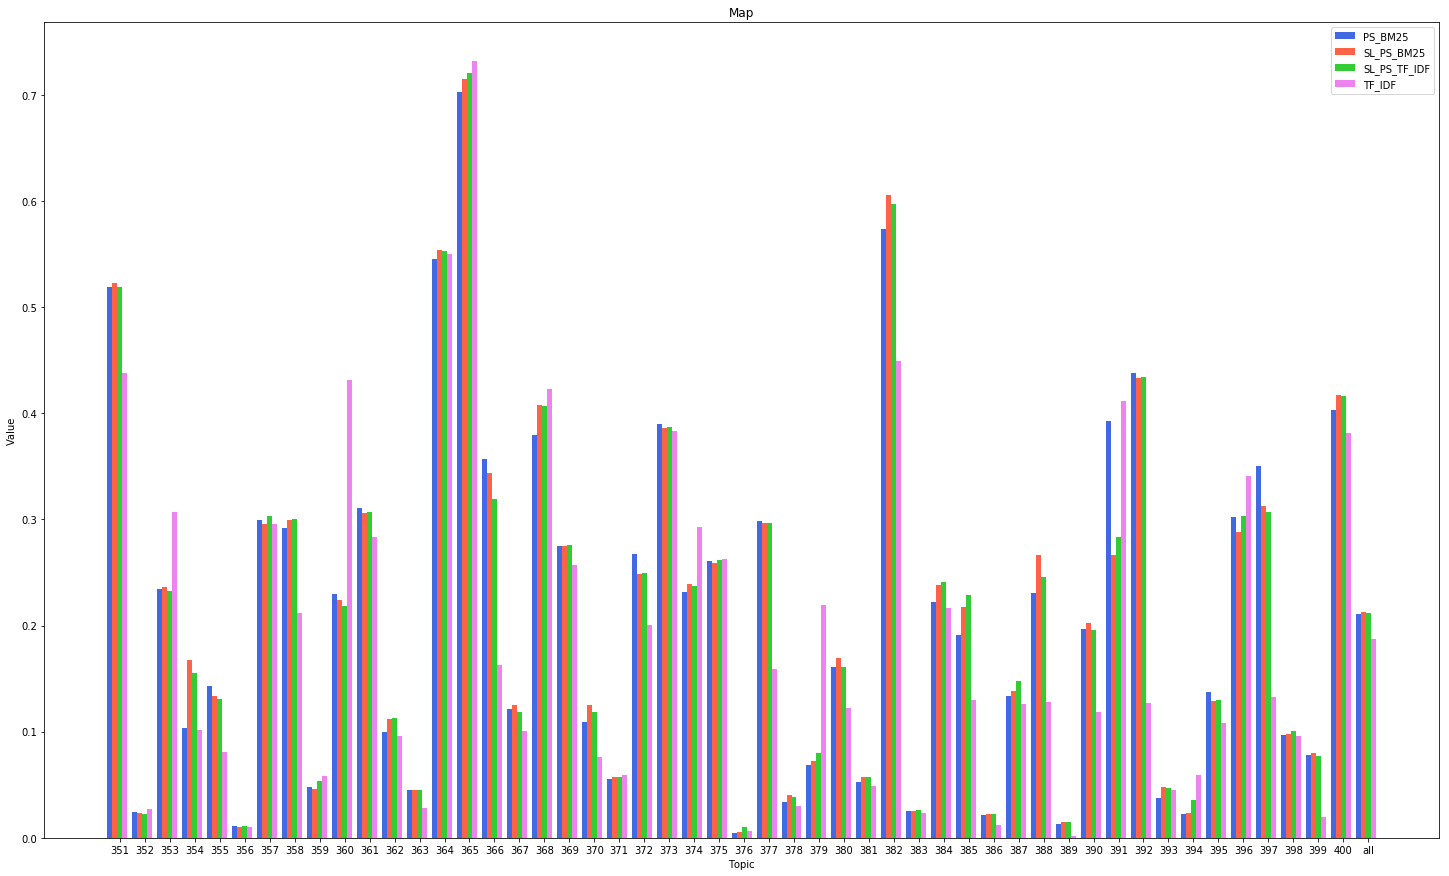

In [3]:
fig1, ax1 = plt.subplots()

rects1 = ax1.bar(ind - 2*width/4, df_map['PS_BM25'], width/4, color='royalblue', label='PS_BM25')
rects2 = ax1.bar(ind - width/4, df_map['SL_PS_BM25'], width/4, color='tomato', label='SL_PS_BM25')
rects3 = ax1.bar(ind, df_map['SL_PS_TF_IDF'], width/4, color='limegreen', label='SL_PS_TF_IDF')
rects4 = ax1.bar(ind + width/4, df_map['TF_IDF'], width/4, color='violet', label='TF_IDF')

ax1.set_ylabel('Value')
ax1.set_xlabel('Topic')
ax1.set_title('Map')
ax1.set_xticks(ind)
ax1.set_xticklabels(topic)
ax1.legend()
fig1.set_figheight(15)
fig1.set_figwidth(25)
plt.savefig("Map_img.png", dpi = 300)
plt.show()

#### 2) Rprec

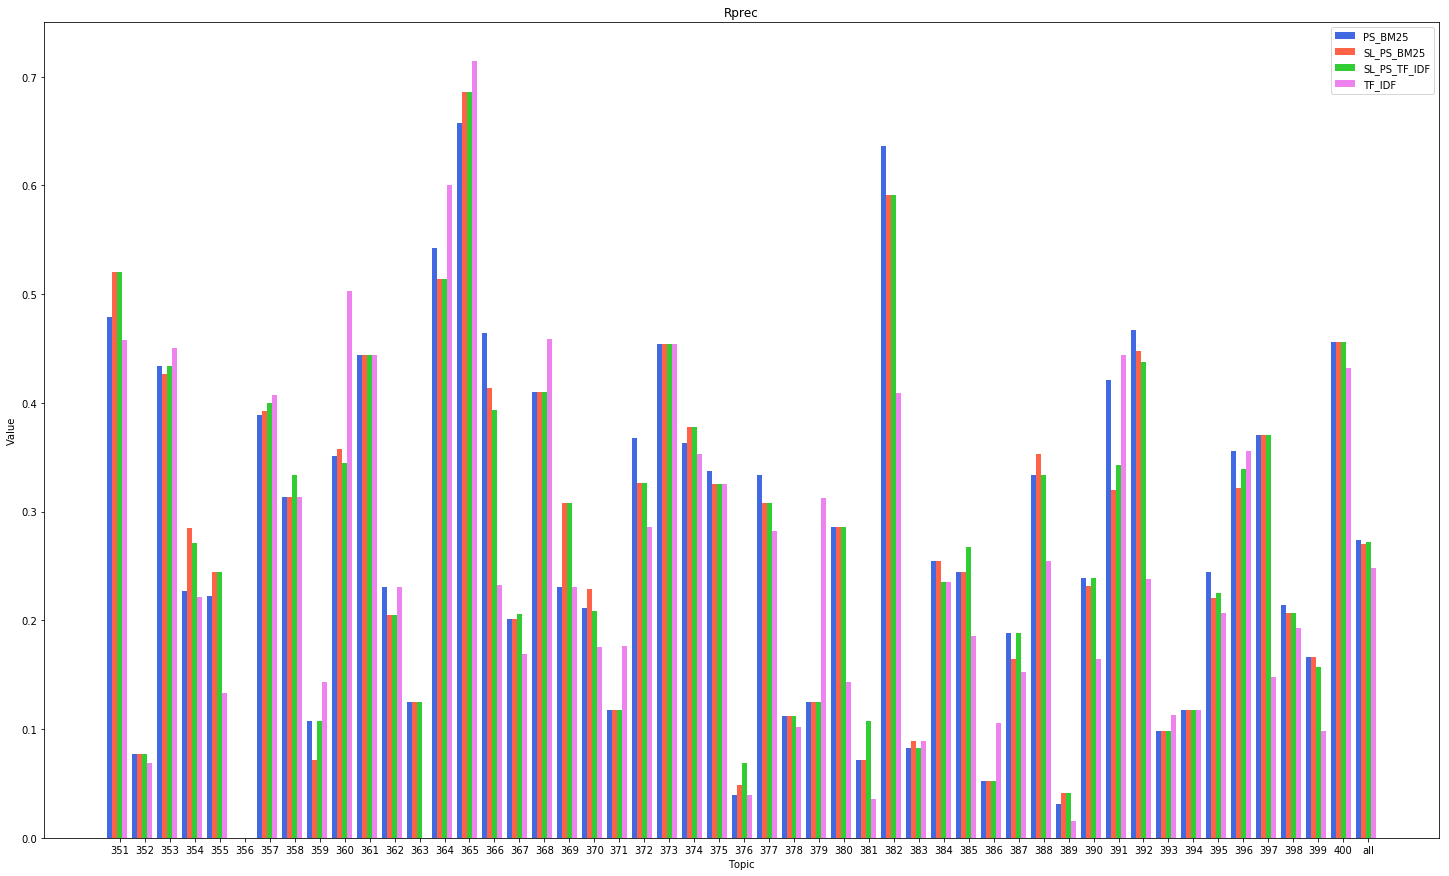

In [4]:
fig2, ax2 = plt.subplots()

rects1 = ax2.bar(ind - 2*width/4, df_Rprec['PS_BM25'], width/4, color='royalblue', label='PS_BM25')
rects2 = ax2.bar(ind - width/4, df_Rprec['SL_PS_BM25'], width/4, color='tomato', label='SL_PS_BM25')
rects3 = ax2.bar(ind, df_Rprec['SL_PS_TF_IDF'], width/4, color='limegreen', label='SL_PS_TF_IDF')
rects4 = ax2.bar(ind + width/4, df_Rprec['TF_IDF'], width/4, color='violet', label='TF_IDF')

ax2.set_ylabel('Value')
ax2.set_xlabel('Topic')
ax2.set_title('Rprec')
ax2.set_xticks(ind)
ax2.set_xticklabels(topic)
ax2.legend()
fig2.set_figheight(15)
fig2.set_figwidth(25)
plt.savefig("Rprec_img.png", dpi = 300)
plt.show()

#### 3) P_10

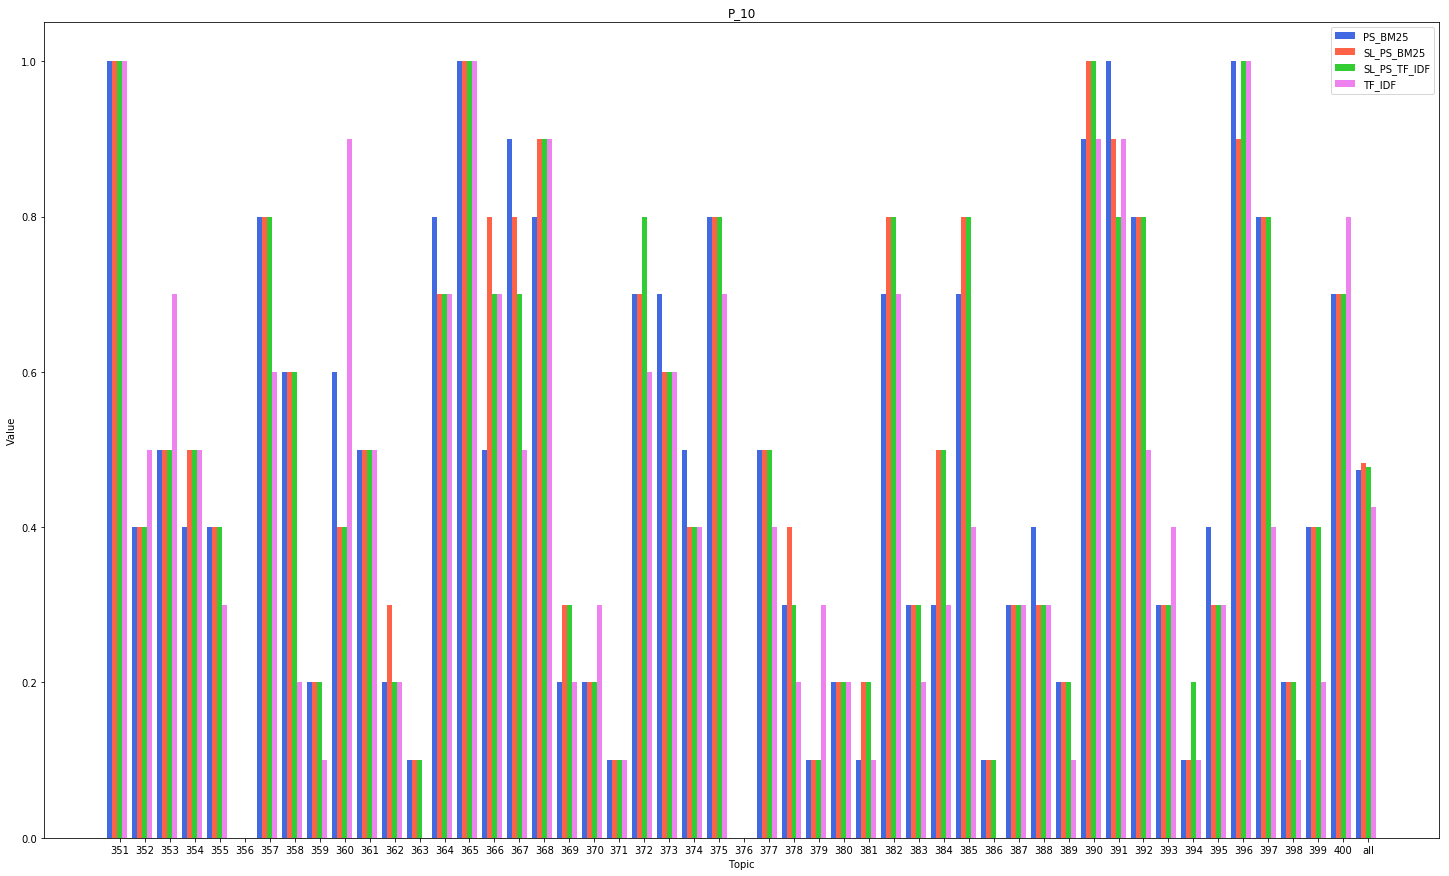

In [5]:
fig3, ax3 = plt.subplots()

rects1 = ax3.bar(ind - 2*width/4, df_p['PS_BM25'], width/4, color='royalblue', label='PS_BM25')
rects2 = ax3.bar(ind - width/4, df_p['SL_PS_BM25'], width/4, color='tomato', label='SL_PS_BM25')
rects3 = ax3.bar(ind, df_p['SL_PS_TF_IDF'], width/4, color='limegreen', label='SL_PS_TF_IDF')
rects4 = ax3.bar(ind + width/4, df_p['TF_IDF'], width/4, color='violet', label='TF_IDF')

ax3.set_ylabel('Value')
ax3.set_xlabel('Topic')
ax3.set_title('P_10')
ax3.set_xticks(ind)
ax3.set_xticklabels(topic)
ax3.legend()
fig3.set_figheight(15)
fig3.set_figwidth(25)
plt.savefig("P_10_img.png", dpi = 300)
plt.show()